In [43]:
# Python library

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics as sm
from sklearn import metrics
from collections import Counter
%matplotlib inline

In [44]:
# Load dataset
df = pd.read_csv("TrainGP.csv") #Reading the dataset in a dataframe using Pandas
df.head()

,Age,Gender,Marital status,Income,Dependents,Transport,Current living,Meal budget,Occupation,Workplace,Good cook,Meal preferences
0,18 - 30 years old,Female,Single,Less than RM1000,0,No,Urban / City,Less than RM400,Student,Institution / College,Yes,Delivery order
1,18 - 30 years old,Female,Single,RM1000 - RM2999,1 - 3 dependents,No,Urban / City,Less than RM400,Employed,Work from office (WFO),No,Delivery order
2,50 years old and above,Male,Married,RM7000 and above,6 dependents and above,Yes,Urban / City,More than RM1000,Retired,Work from home (WFH),Yes,Own meal cook
3,18 - 30 years old,Male,Single,RM1000 - RM2999,0,Yes,Urban / City,RM400 - RM699,Employed,Work from office (WFO),Yes,Dine In
4,31 - 40 years old,Female,Married,RM1000 - RM2999,1 - 3 dependents,Yes,Rural / Village,RM400 - RM699,Employed,Work from home (WFH),No,Own meal cook


In [45]:
df.head(10)

,Age,Gender,Marital status,Income,Dependents,Transport,Current living,Meal budget,Occupation,Workplace,Good cook,Meal preferences
0,18 - 30 years old,Female,Single,Less than RM1000,0,No,Urban / City,Less than RM400,Student,Institution / College,Yes,Delivery order
1,18 - 30 years old,Female,Single,RM1000 - RM2999,1 - 3 dependents,No,Urban / City,Less than RM400,Employed,Work from office (WFO),No,Delivery order
2,50 years old and above,Male,Married,RM7000 and above,6 dependents and above,Yes,Urban / City,More than RM1000,Retired,Work from home (WFH),Yes,Own meal cook
3,18 - 30 years old,Male,Single,RM1000 - RM2999,0,Yes,Urban / City,RM400 - RM699,Employed,Work from office (WFO),Yes,Dine In
4,31 - 40 years old,Female,Married,RM1000 - RM2999,1 - 3 dependents,Yes,Rural / Village,RM400 - RM699,Employed,Work from home (WFH),No,Own meal cook
5,41 - 50 years old,Female,Married,RM7000 and above,4 - 6 dependents,Yes,Urban / City,More than RM1000,Employed,Work from office (WFO),Yes,Dine In
6,31 - 40 years old,Male,Single,RM1000 - RM2999,1 - 3 dependents,Yes,Urban / City,RM400 - RM699,Employed,Work from office (WFO),No,Own meal cook
7,50 years old and above,Male,Married,RM7000 and above,4 - 6 dependents,Yes,Urban / City,RM400 - RM699,Retired,Work from office (WFO),Yes,Dine In
8,18 - 30 years old,Male,Single,Less than RM1000,0,No,Rural / Village,Less than RM400,Student,Work from home (WFH),Yes,Own meal cook
9,50 years old and above,Female,Married,RM7000 and above,4 - 6 dependents,Yes,Urban / City,More than RM1000,Retired,Work from home (WFH),Yes,Own meal cook


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               404 non-null    object
 1   Gender            404 non-null    object
 2   Marital status    404 non-null    object
 3   Income            404 non-null    object
 4   Dependents        403 non-null    object
 5   Transport         404 non-null    object
 6   Current living    404 non-null    object
 7   Meal budget       404 non-null    object
 8   Occupation        403 non-null    object
 9   Workplace         404 non-null    object
 10  Good cook         403 non-null    object
 11  Meal preferences  404 non-null    object
dtypes: object(12)
memory usage: 38.0+ KB


In [47]:
# To report missing data
df.apply(lambda x: sum(x.isnull()),axis=0)

Age                 0
Gender              0
Marital status      0
Income              0
Dependents          1
Transport           0
Current living      0
Meal budget         0
Occupation          1
Workplace           0
Good cook           1
Meal preferences    0
dtype: int64

In [48]:
df['Meal budget'].fillna(df['Meal budget'].mode()[0], inplace=True)
df['Occupation'].fillna(df['Occupation'].mode()[0], inplace=True)
df['Workplace'].fillna(df['Workplace'].mode()[0], inplace=True)
df['Income'].fillna('Income',inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Transport'].fillna(df['Transport'].mode()[0], inplace=True)
df['Current living'].fillna(df['Current living'].mode()[0], inplace=True)
df['Income'].fillna('Income',inplace=True)
df['Good cook'].fillna('Good cook',inplace=True)
df['Meal preferences'].fillna('Meal preferences',inplace=True)

In [49]:
# Recheck missing data
df.apply(lambda x: sum(x.isnull()),axis=0) 

Age                 0
Gender              0
Marital status      0
Income              0
Dependents          0
Transport           0
Current living      0
Meal budget         0
Occupation          0
Workplace           0
Good cook           0
Meal preferences    0
dtype: int64

In [50]:
# Convert to numerical
var_mod = ['Age','Gender','Marital status','Income','Dependents','Transport','Current living','Meal budget','Occupation','Workplace','Good cook','Meal preferences']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes

Age                 int32
Gender              int32
Marital status      int32
Income              int32
Dependents          int32
Transport           int32
Current living      int32
Meal budget         int32
Occupation          int32
Workplace           int32
Good cook           int32
Meal preferences    int32
dtype: object

In [51]:
df.head()

,Age,Gender,Marital status,Income,Dependents,Transport,Current living,Meal budget,Occupation,Workplace,Good cook,Meal preferences
0,0,0,1,0,0,0,1,0,2,0,2,0
1,0,0,1,1,1,0,1,0,0,3,1,0
2,3,1,0,4,3,1,1,1,1,2,2,2
3,0,1,1,1,0,1,1,2,0,3,2,1
4,1,0,0,1,1,1,0,2,0,2,1,2


In [52]:
x = df.iloc[:, 1:11]
y = df.loc[:, ['Meal preferences']]

In [53]:
# Modelling

# K-Nearest Neighbor
model = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=None,n_neighbors=2,p=1, weights='uniform')
model.fit(x, y)
yPred = model.predict(x)
# small k lead to more complex model and OF

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Text(0.5, 1.0, 'Training Accuracy Score: 0.8960396039603961')

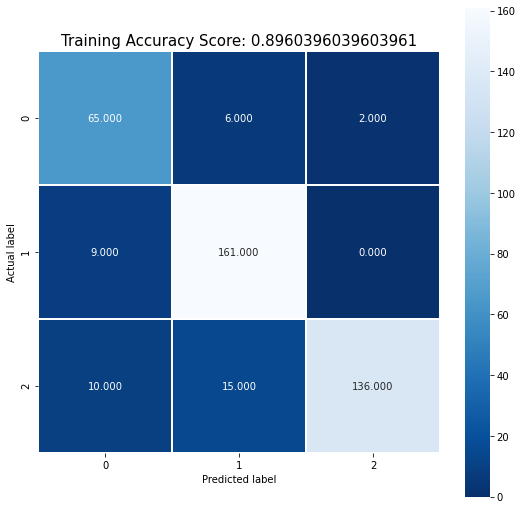

In [54]:
# Testing & performance analysis -Trainning data

# Seaborn #Run at new python 3
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(sm.confusion_matrix(y, yPred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Training Accuracy Score: {0}'.format(sm.accuracy_score(y, yPred))
plt.title(all_sample_title, size = 15)

In [55]:
# Testing & performance analysis -Testing data

df2 = pd.read_csv("TestGP.csv")

In [56]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               105 non-null    object
 1   Gender            105 non-null    object
 2   Marital status    105 non-null    object
 3   Income            105 non-null    object
 4   Dependents        105 non-null    object
 5   Transport         105 non-null    object
 6   Current living    104 non-null    object
 7   Meal budget       105 non-null    object
 8   Occupation        105 non-null    object
 9   Workplace         105 non-null    object
 10  Good cook         105 non-null    object
 11  Meal preferences  105 non-null    object
dtypes: object(12)
memory usage: 10.0+ KB


In [57]:
df2.head()

,Age,Gender,Marital status,Income,Dependents,Transport,Current living,Meal budget,Occupation,Workplace,Good cook,Meal preferences
0,Less than 18 years old,Female,Single,RM1000 - RM2999,6 dependents and above,Yes,Rural / Village,RM400 - RM699,Employed,Work from office (WFO),Yes,Own meal cook
1,50 years old and above,Female,Married,RM7000 and above,4 - 6 dependents,Yes,Urban / City,More than RM1000,Retired,Work from home (WFH),Yes,Own meal cook
2,31 - 40 years old,Male,Single,RM1000 - RM2999,1 - 3 dependents,Yes,Urban / City,RM400 - RM699,Employed,Work from office (WFO),No,Own meal cook
3,31 - 40 years old,Male,Single,RM1000 - RM2999,0,No,Rural / Village,Less than RM400,Unemployed,Work from home (WFH),No,Own meal cook
4,18 - 30 years old,Male,Single,Less than RM1000,0,Yes,Urban / City,Less than RM400,Student,Institution / College,Yes,Dine In


In [58]:
df2['Current living'].fillna('City',inplace=True)

In [59]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               105 non-null    object
 1   Gender            105 non-null    object
 2   Marital status    105 non-null    object
 3   Income            105 non-null    object
 4   Dependents        105 non-null    object
 5   Transport         105 non-null    object
 6   Current living    105 non-null    object
 7   Meal budget       105 non-null    object
 8   Occupation        105 non-null    object
 9   Workplace         105 non-null    object
 10  Good cook         105 non-null    object
 11  Meal preferences  105 non-null    object
dtypes: object(12)
memory usage: 10.0+ KB


In [60]:
# Convert to numerical
var_mod2 = ['Age','Gender','Marital status','Income','Dependents','Transport','Current living','Meal budget','Occupation','Workplace','Good cook','Meal preferences']
le2 = LabelEncoder()
for i in var_mod2:
    df2[i] = le.fit_transform(df2[i])
df2.dtypes

Age                 int32
Gender              int32
Marital status      int32
Income              int32
Dependents          int32
Transport           int32
Current living      int32
Meal budget         int32
Occupation          int32
Workplace           int32
Good cook           int32
Meal preferences    int32
dtype: object

In [61]:
x2 = df2.iloc[:, 1:11]
y2 = df2.loc[:, ['Meal preferences']]
yPred2 = model.predict(x2)

Text(0.5, 1.0, 'Testing Accuracy Score: 0.7714285714285715')

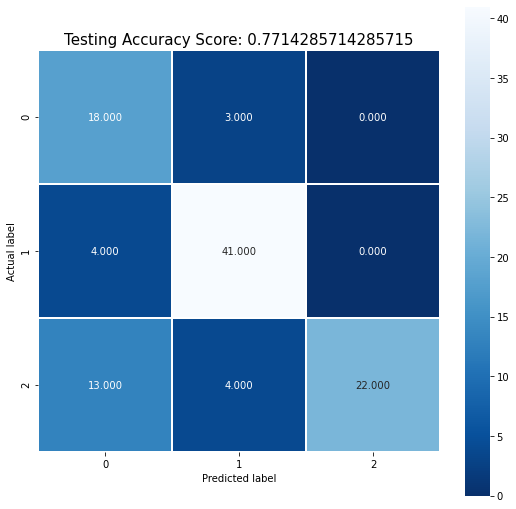

In [62]:
# Seaborn #Run at new python 3
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(sm.confusion_matrix(y2, yPred2), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Testing Accuracy Score: {0}'.format(sm.accuracy_score(y2, yPred2))
plt.title(all_sample_title, size = 15)